In [1]:
# importan las librerias y el dataset a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import ScalarFormatter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#cargamos el dataset
properati = pd.read_csv('C:/Users/ferna/Notebooks/PROYECTO FINAL DS/properati_dataset.csv')


def metricas(modelo):
    print("Metricas para datos de testing:\n")
    score = modelo.score(X_test, y_test)
    print("R-squared:", score.round(3))
    y_test_pred = modelo.predict(X_test)

    mse = mean_squared_error(y_test, y_test_pred)
    print("MAE: ", mean_absolute_error(y_test,y_test_pred).round(3))
    print("MSE: ", mse.round(3))
    print("RMSE: ", np.sqrt(mse).round(3))
    
def error_graph(y_train, y_test, y_train_pred, y_test_pred):
    '''
    Dado los sets de entrenamiento y test de la variable target, y los valores predichos por el modelo para los
    sets de entrenamiento y test, se obtienen un histograma con la diferencia entre los valores predichos y 
    los valores reales (error) y un scatterplot que grafica la relación entre los valores predichos y valores reales
    Args:
    - y_train: set de entrenamiento de la variable target
    - y_test: set de prueba de la variable target
    - y_train_pred: valores predichos sobre datos de entrenamiento
    - y_test_pred: valores predichos sobre datos de prueba
    
    Returns:
    - Histograma de errores
    - Scatterplot y_test_pred vs y_test
    '''
    plt.figure(figsize = (15,4))
    
    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 30, label = 'train', color='blue', kde=True)
    sns.histplot(y_test - y_test_pred, bins = 30, label = 'test', color='red', kde=True)
    plt.xlabel('Errores')
    plt.legend()
    
    ax=plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),]
    
    ax.plot(lims, lims, alpha=0.75, zorder=0, c='r')
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)');

##  2. Algoritmos de Regresión con el dataset de Properati

Ya habiendo hecho el análisis y transformación de los datos vamos a probar algoritmos de regresión para poder predecir el precio de las casas con los demás datos que tenemos.

Como un manera de optimizar el costo computacional, se realizará la prueba de los algoritmos candidatos sobre el dataset completo. Luego el que mejor rendimiento obtenga de base, será utilizado para los sets compuestos por cada tipo de propiedad.

#### Elección de modelos predictivos.
1. Para empezar contaremos con nuestro modelo benchmark que servirá para comparar los resultados obtenidos, el mismo será el modelo de **REGRESIÓN LINEAL**.
2. **RANDOM FOREST REGRESSOR** utilizando los tres criterions (“squared_error”, “absolute_error”, “poisson”)
3. **DECISION TREE REGRESSOR**
4. **GRADIENT BOOSTING REGRESSOR**

#### Tratamiento de variables categóricas 

In [2]:
properati

,Unnamed: 0,lat,lon,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,138,-34.630374,-58.707596,Ituzaingó,3,2,1,292,90,110000.0,Casa
1,252,-34.871555,-58.025476,La Plata,7,3,2,325,325,120000.0,Casa
2,319,-34.916178,-57.993599,La Plata,6,4,3,230,183,170000.0,Casa
3,384,-34.650923,-58.489653,Mataderos,3,2,1,171,120,179900.0,Casa
4,459,-34.822145,-58.479788,Esteban Echeverría,3,1,1,227,80,123000.0,Casa
...,...,...,...,...,...,...,...,...,...,...,...
73929,146652,-34.582228,-58.540320,General San Martín,2,1,1,38,38,70000.0,Departamento
73930,146655,-34.816348,-58.181963,Berazategui,2,1,1,54,48,165000.0,Departamento
73931,146657,-34.444633,-58.981606,Pilar,1,1,1,50,35,73000.0,Departamento
73932,146658,-34.444830,-58.981796,Pilar,2,1,1,38,38,68000.0,Departamento


In [3]:
properati = properati.drop("Unnamed: 0",axis=1)

Se convierten las variables categoricas en columnas por categoría

In [4]:
properati_fit = pd.get_dummies(data=properati,prefix="barrio",columns=["barrio"],drop_first=True)
properati_fit = pd.get_dummies(data=properati_fit,prefix="tipo_propiedad",columns=["property_type"],drop_first=True)

#### Creación de sets de entrenamiento y prueba

Creo las variables X e y

In [5]:
# se crean las variables X e y
X = properati_fit.drop(["price"], axis=1) 
y = properati_fit.price

Usamos el train test split para separar el 70/30 del dataset en entrenamiento y prueba, respectivamente

In [6]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=88) 

### 2.1 Regresión Lineal

Podemos probar con una regresión linear para ver cuan buen resultado tiene, solo está cerca del 50% en el R cuadrado y las demás métricas tienen una diferencia de casi el doble de las que obtuvimos anteriormente

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
y_train_pred = lr.predict(X_train) 
y_test_pred = lr.predict(X_test)

In [9]:
metricas(lr)

Metricas para datos de testing:

R-squared: 0.551
MAE:  27694.848
MSE:  1300540949.228
RMSE:  36063.014


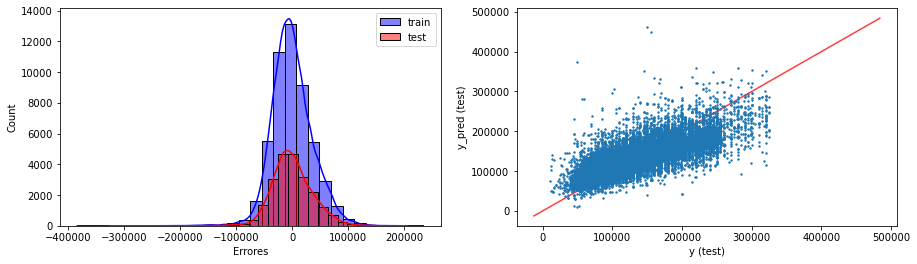

In [10]:
error_graph(y_train, y_test, y_train_pred, y_test_pred)

### 2.2.1 Random Forest Regression con criterion 'squared error'

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
y_train_pred = rf.predict(X_train) 
y_test_pred = rf.predict(X_test)

In [13]:
metricas(rf)

Metricas para datos de testing:

R-squared: 0.83
MAE:  13450.66
MSE:  491596984.621
RMSE:  22171.986


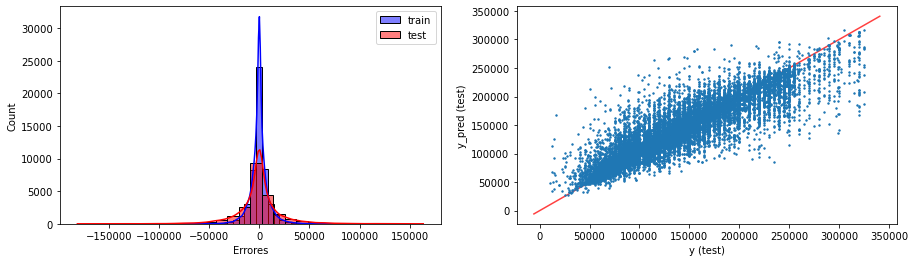

In [14]:
error_graph(y_train, y_test, y_train_pred, y_test_pred)

Viendo las metricas vemos que el R cuadrado es mayor a 80% con la data de testing, el RMSE nos dice que hay una desviación estandar de poco más de 22000 USD en los valores y el valor absoluto medio nos da 13400 USD de diferencia

### 2.2.2 Random Forest Regressor con criterion 'poisson'

Experimentamos con otro criterion, poisson y nos da un resultado menos satisfactorio que utilizando el squared error

In [15]:
rf = RandomForestRegressor(criterion='poisson')
rf.fit(X_train, y_train)

RandomForestRegressor(criterion='poisson')

In [16]:
y_train_pred = rf.predict(X_train) 
y_test_pred = rf.predict(X_test)

In [17]:
metricas(rf)

Metricas para datos de testing:

R-squared: 0.775
MAE:  15497.91
MSE:  650438850.487
RMSE:  25503.703


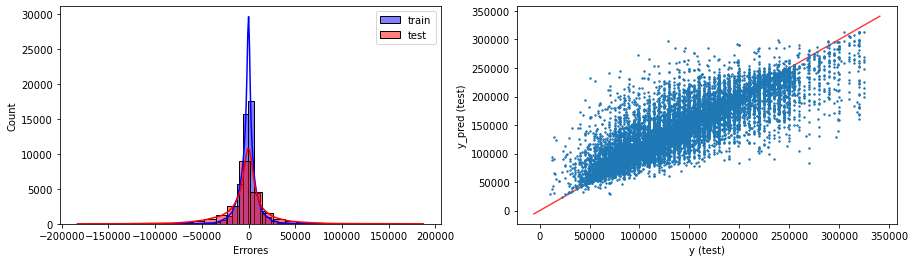

In [18]:
error_graph(y_train, y_test, y_train_pred, y_test_pred)

### 2.2.3 Random Forest Regressor con criterion 'absolute error'

Probamos utilizar como criterion el absolute error en el Random Forest y tiene mejores resultados en las métricas a cuando usamos squared error, aunque por la complejidad del algoritmo consume mucho más tiempo, toma varias horas al lado de los segundos que nos tardo el primer entrenamiento, por lo tanto vamos a descartarlo para el modelo final

In [19]:
rf = RandomForestRegressor(criterion='absolute_error')
rf.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error')

In [20]:
metricas(rf)

Metricas para datos de testing:

R-squared: 0.834
MAE:  13372.78
MSE:  481626120.235
RMSE:  21945.982


In [21]:
y_train_pred = rf.predict(X_train) 
y_test_pred = rf.predict(X_test)

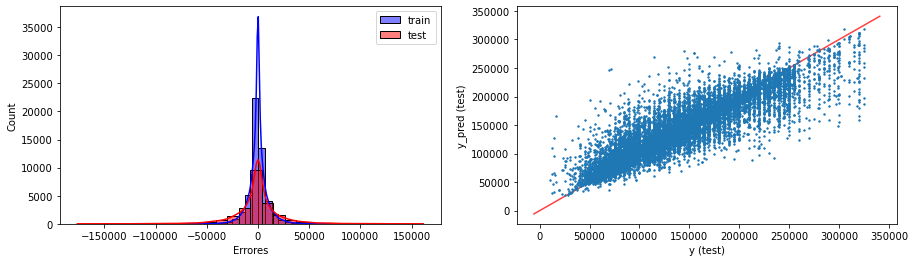

In [22]:
error_graph(y_train, y_test, y_train_pred, y_test_pred)

### 2.3.1 Decision Tree Regresor

In [23]:
from sklearn.tree import DecisionTreeRegressor 
  
dtr = DecisionTreeRegressor(random_state = 0) 
  
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [24]:
y_train_pred = dtr.predict(X_train) 
y_test_pred = dtr.predict(X_test)

In [25]:
metricas(dtr)

Metricas para datos de testing:

R-squared: 0.698
MAE:  15740.341
MSE:  874701215.665
RMSE:  29575.348


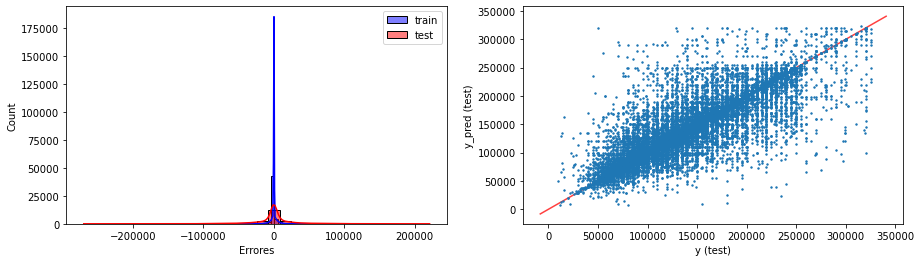

In [26]:
error_graph(y_train, y_test, y_train_pred, y_test_pred)

Con el árbol de decisión  tenemos resultados inferiores a los de Random Forest Regressor

### 2.3.2 Decision Tree Regresor Friedman MSE

Ahora vamos a probar los demás criterion del decision tree, con Friedman tenemos resultados similares a squared error

In [27]:
dtr = DecisionTreeRegressor(random_state = 0,criterion="friedman_mse") 

dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', random_state=0)

In [28]:
y_train_pred = dtr.predict(X_train) 
y_test_pred = dtr.predict(X_test)


In [29]:
metricas(dtr)

Metricas para datos de testing:

R-squared: 0.699
MAE:  15686.955
MSE:  871502881.138
RMSE:  29521.228


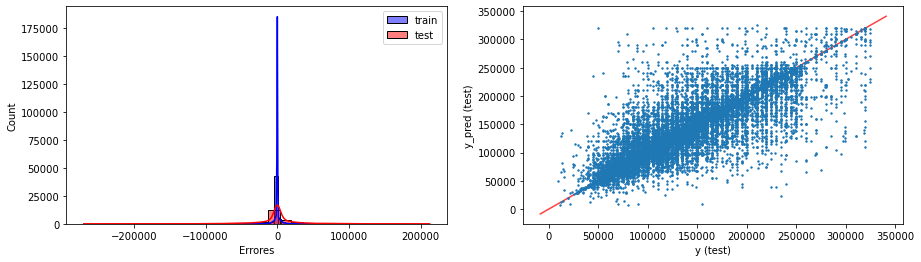

In [30]:
error_graph(y_train, y_test, y_train_pred, y_test_pred)

### 2.3.3 Decision Tree Regresor Poisson

Con Poisson tenemos peores resultados que las otras variantes

In [31]:
dtr = DecisionTreeRegressor(random_state = 0,criterion="poisson") 
  
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', random_state=0)

In [32]:
y_train_pred = dtr.predict(X_train) 
y_test_pred = dtr.predict(X_test)

In [33]:
metricas(dtr)

Metricas para datos de testing:

R-squared: 0.665
MAE:  16800.357
MSE:  971589591.297
RMSE:  31170.332


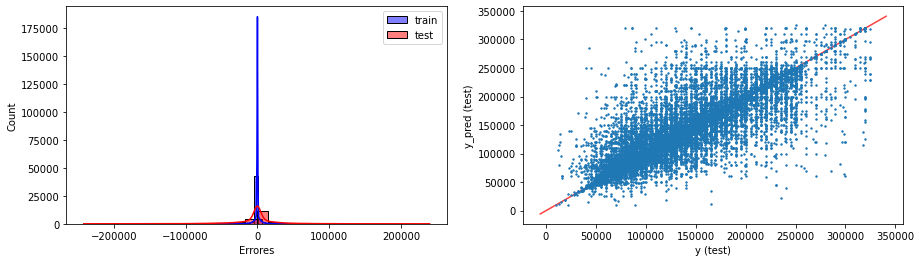

In [34]:
error_graph(y_train, y_test, y_train_pred, y_test_pred)

### 2.3.4 Decision Tree Regressor Absolute Error

Al igual que nos pasó con el Random Forest, el absolute error tiene métricas similares al squared error pero es significativamente más lento en la ejecución

In [35]:
dtr = DecisionTreeRegressor(random_state = 0,criterion="absolute_error") 
  
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=0)

In [36]:
y_train_pred = dtr.predict(X_train) 
y_test_pred = dtr.predict(X_test)

In [37]:
metricas(dtr)

Metricas para datos de testing:

R-squared: 0.7
MAE:  15618.87
MSE:  867704989.703
RMSE:  29456.833


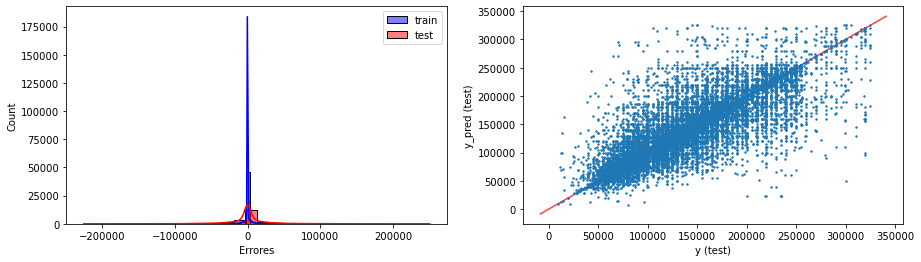

In [38]:
error_graph(y_train, y_test, y_train_pred, y_test_pred)

### 4. Gradient Boosting Regressor 

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [40]:
y_train_pred = gbr.predict(X_train) 
y_test_pred = gbr.predict(X_test)

In [41]:
metricas(gbr)

Metricas para datos de testing:

R-squared: 0.661
MAE:  23502.216
MSE:  982619494.024
RMSE:  31346.762


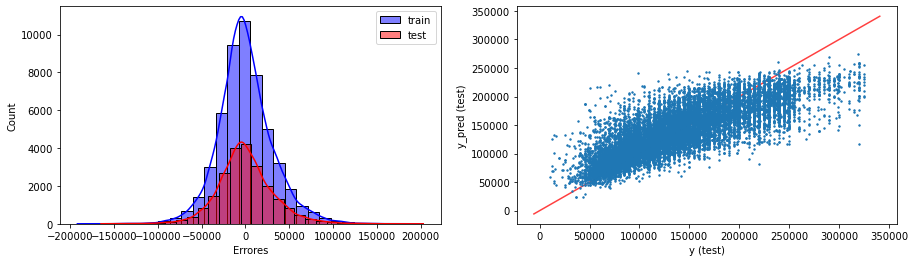

In [42]:
error_graph(y_train, y_test, y_train_pred, y_test_pred)

Por último probamos con gradient boosting pero no supera los resultados del Random Forest

### Elección de modelo final

De los algoritmos probados, los mejores resultados de base obtenidos fueron con el Random Forest Regressor, con el criterion de squared error, por lo que por ahora es nuestro algoritmo elegido para resolver nuestra problematica